In [2]:
img = cv2.imread("nature.jpg")  
if img is None:
    raise FileNotFoundError("Image not found! Check the path.")
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

Sampling factor 2:
RGB - min:0, max:255, mean:120.94
Gray - min:0, max:254, mean:125.05

Sampling factor 4:
RGB - min:0, max:255, mean:120.98
Gray - min:0, max:253, mean:125.09

Sampling factor 8:
RGB - min:0, max:255, mean:121.05
Gray - min:0, max:253, mean:125.15



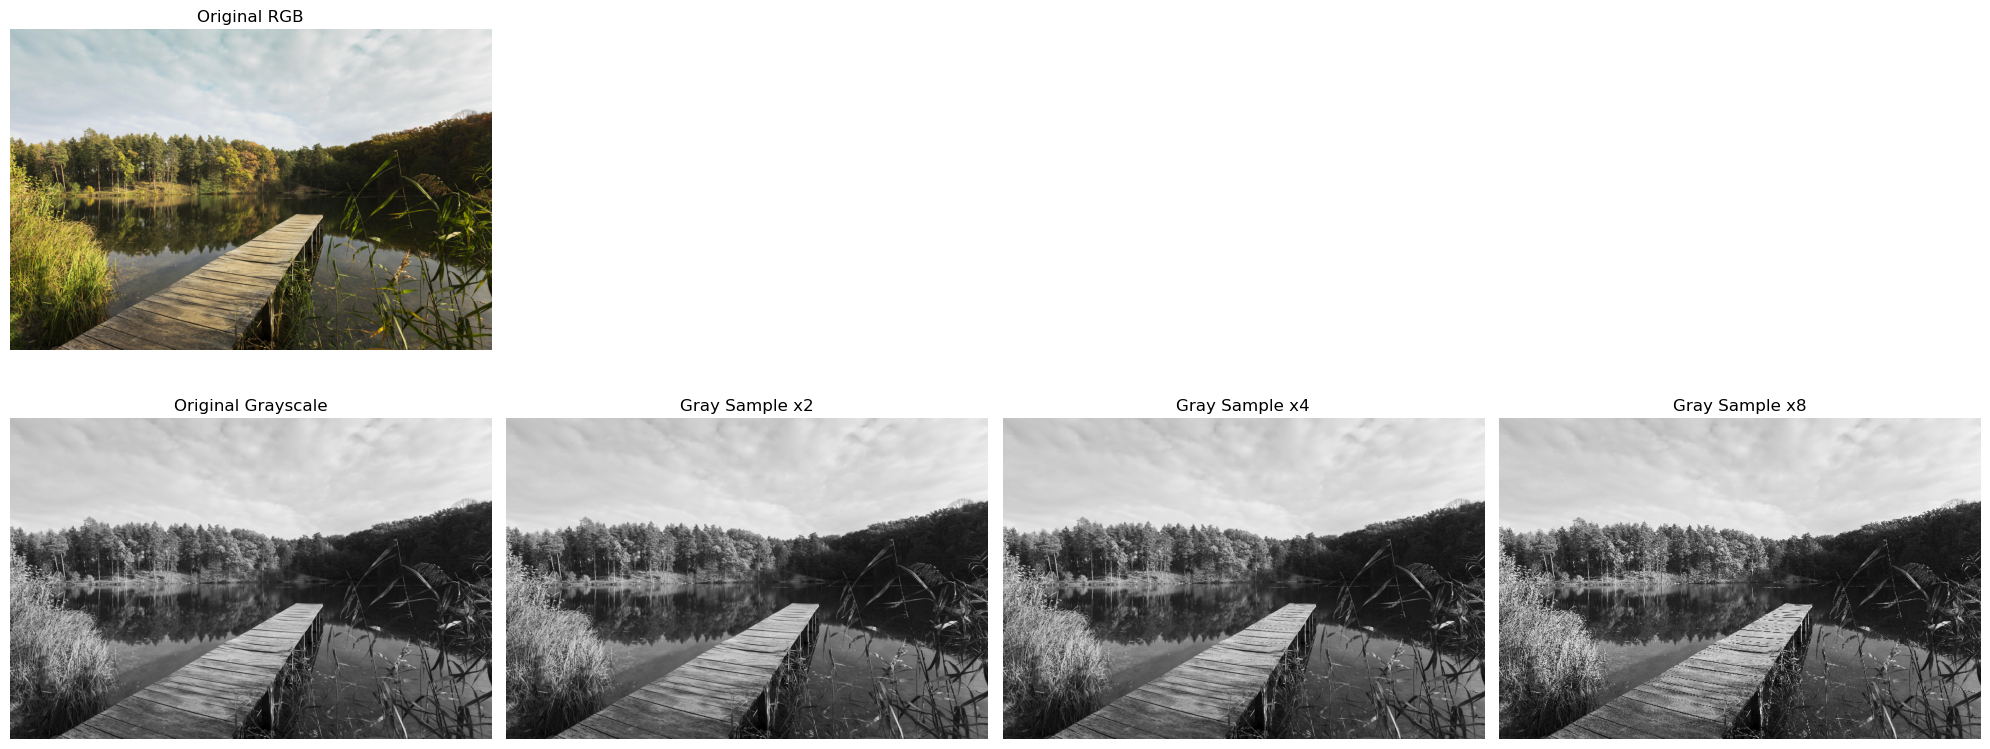

In [3]:
factors = [2, 4, 8]
plt.figure(figsize=(20, 8))
plt.subplot(2, len(factors)+1, 1)
plt.imshow(img_rgb)
plt.title("Original RGB")
plt.axis('off')
plt.subplot(2, len(factors)+1, len(factors)+2)
plt.imshow(img_gray, cmap='gray')
plt.title("Original Grayscale")
plt.axis('off')
for i, factor in enumerate(factors):
    sampled_rgb = img_rgb[::factor, ::factor]
    sampled_gray = img_gray[::factor, ::factor]  
    plt.subplot(2, len(factors)+1, len(factors)+3+i)
    plt.imshow(sampled_gray, cmap='gray')
    plt.title(f"Gray Sample x{factor}")
    plt.axis('off')  
    print(f"Sampling factor {factor}:")
    print(f"RGB - min:{sampled_rgb.min()}, max:{sampled_rgb.max()}, mean:{sampled_rgb.mean():.2f}")
    print(f"Gray - min:{sampled_gray.min()}, max:{sampled_gray.max()}, mean:{sampled_gray.mean():.2f}\n")
plt.tight_layout()
plt.show()

Quantization to 2 levels, unique values: [  0 255]
Quantization to 4 levels, unique values: [  0  85 170 255]
Quantization to 8 levels, unique values: [  0  36  72 109 145 182 218 254]


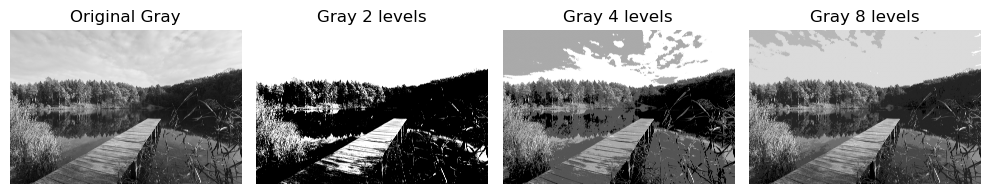

In [4]:
quant_levels = [2, 4, 8]
plt.figure(figsize=(10, 10))
plt.subplot(2, len(quant_levels)+1, 1)
plt.imshow(img_gray, cmap='gray')
plt.title("Original Gray")
plt.axis('off')
for i, levels in enumerate(quant_levels):
    image_float = img_gray.astype(np.float32)
    step = 255 / (levels - 1)
    q_gray = np.round(image_float / step) * step
    q_gray = q_gray.astype(np.uint8)
    
    plt.subplot(2, len(quant_levels)+1, i+2)
    plt.imshow(q_gray, cmap='gray')
    plt.title(f"Gray {levels} levels")
    plt.axis('off')
    unique_vals = np.unique(q_gray)
    print(f"Quantization to {levels} levels, unique values: {unique_vals}")
plt.tight_layout()
plt.show()

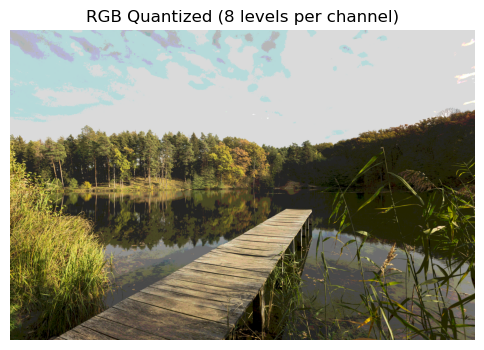

Unique R values: [  0  36  72 109 145 182 218 254]
Unique G values: [  0  36  72 109 145 182 218 254]
Unique B values: [  0  36  72 109 145 182 218 254]


In [5]:
image_float_rgb = img_rgb.astype(np.float32)
step_rgb = 255 / (8 - 1)
q_rgb = np.round(image_float_rgb / step_rgb) * step_rgb
q_rgb = q_rgb.astype(np.uint8)
plt.figure(figsize=(6,6))
plt.imshow(q_rgb)
plt.title("RGB Quantized (8 levels per channel)")
plt.axis('off')
plt.show()
unique_r = np.unique(q_rgb[:,:,0])
unique_g = np.unique(q_rgb[:,:,1])
unique_b = np.unique(q_rgb[:,:,2])
print(f"Unique R values: {unique_r}")
print(f"Unique G values: {unique_g}")
print(f"Unique B values: {unique_b}")